# NOTEBOOK JULIA

In [273]:
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv('complex-master-learn-and-get-your-mark/train.csv')
test=pd.read_csv('complex-master-learn-and-get-your-mark/test.csv')

In [230]:
train.head()

,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks,FreePass
0,01/2362,Head Hunters,False,3.055,B/140/N,"Everything worked, yet nothing surprised me. (...",NYC12-5pm,22.0,False,170.0,1.0,True
1,04/0599,Bright Size Life,True,2.510,LB/124/N,"Solid gig—nothing magical, nothing awful. (NYC...",NYC12-5pm,9.0,False,0.0,0.0,True
2,01/3223,Head Hunters,False,0.803,CB/523/N,"Guitars were sharp, but everything else felt r...",NYC12-5pm,NaN,False,815.0,37.0,False
3,01/1966,Kind of Blue,False,0.568,A/81/XL,Feedback screamed louder than the guitars. Dis...,FL16-7pm,36.0,False,1427.0,1395.0,False
4,01/8850,Bright Size Life,False,0.034,B/580/XL,NaN,NYC12-5pm,16.0,False,1299.0,0.0,False


In [231]:
train.shape

(10116, 12)

In [232]:
test.shape

(2854, 11)

In [233]:
train.columns

Index(['Id', 'PreferedAlbum', 'Vinyl', 'AvgTime', 'TicketInfo', 'Opinion',
       'Concert', 'Age', 'VIP', 'Food', 'Drinks', 'FreePass'],
      dtype='object')

In [234]:
col_names = train.columns.tolist()

print("Column names:")
print(col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
train[to_show].head(6)

Column names:
['Id', 'PreferedAlbum', 'Vinyl', 'AvgTime', 'TicketInfo', 'Opinion', 'Concert', 'Age', 'VIP', 'Food', 'Drinks', 'FreePass']

Sample data:


,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks,FreePass
0,01/2362,Head Hunters,False,3.055,B/140/N,"Everything worked, yet nothing surprised me. (...",NYC12-5pm,22.0,False,170.0,1.0,True
1,04/0599,Bright Size Life,True,2.510,LB/124/N,"Solid gig—nothing magical, nothing awful. (NYC...",NYC12-5pm,9.0,False,0.0,0.0,True
2,01/3223,Head Hunters,False,0.803,CB/523/N,"Guitars were sharp, but everything else felt r...",NYC12-5pm,NaN,False,815.0,37.0,False
3,01/1966,Kind of Blue,False,0.568,A/81/XL,Feedback screamed louder than the guitars. Dis...,FL16-7pm,36.0,False,1427.0,1395.0,False
4,01/8850,Bright Size Life,False,0.034,B/580/XL,NaN,NYC12-5pm,16.0,False,1299.0,0.0,False
5,03/0753,Kind of Blue,True,2.816,NaN,World-class musicianship; I’d travel to see th...,FL16-7pm,42.0,False,0.0,0.0,True


Freepass

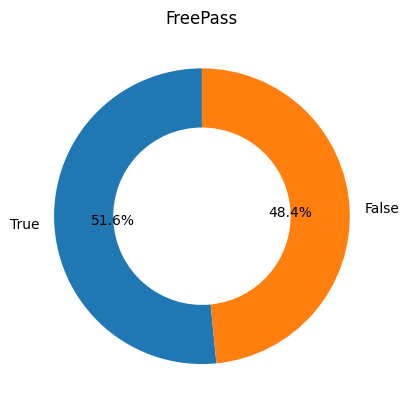

In [235]:
conteo = train["FreePass"].value_counts()

plt.figure()
plt.pie(
    conteo,
    labels=conteo.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)  # esto lo hace donut
)

plt.title("FreePass")
plt.show()

50% a cada lado

## Missing data

Creo nuevas columnas con True o False si tiene o no el dato

In [236]:
train.isna().sum()

Id                  0
PreferedAlbum     235
Vinyl             249
AvgTime             0
TicketInfo        231
Opinion          1503
Concert           216
Age               216
VIP               235
Food                0
Drinks              0
FreePass            0
dtype: int64

Columnas vacías

In [237]:
nan_cols = [
    'PreferedAlbum',
    'Vinyl',
    'TicketInfo',
    'Opinion',
    'Concert',
    'Age',
    'VIP'
]


In [238]:
for col in nan_cols:
    train[f'{col}_isNaN'] = train[col].isna()
    test[f'{col}_isNaN'] = test[col].isna()


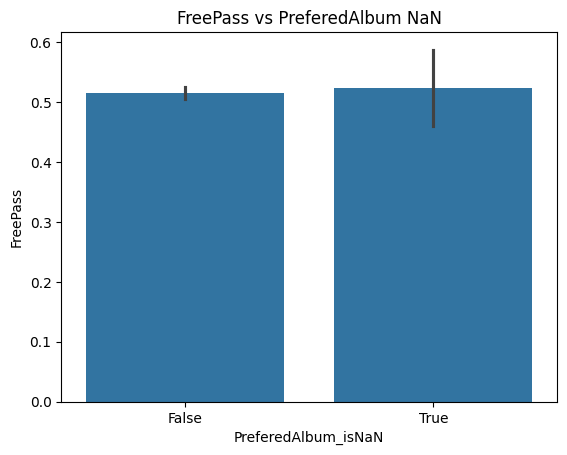

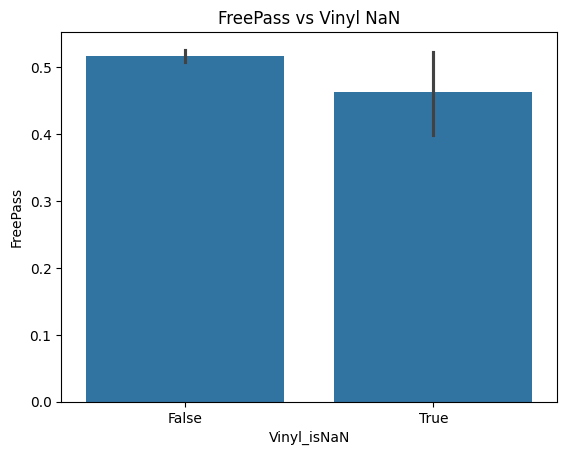

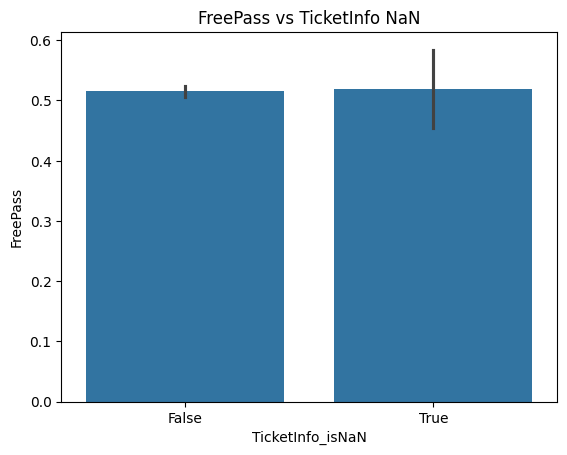

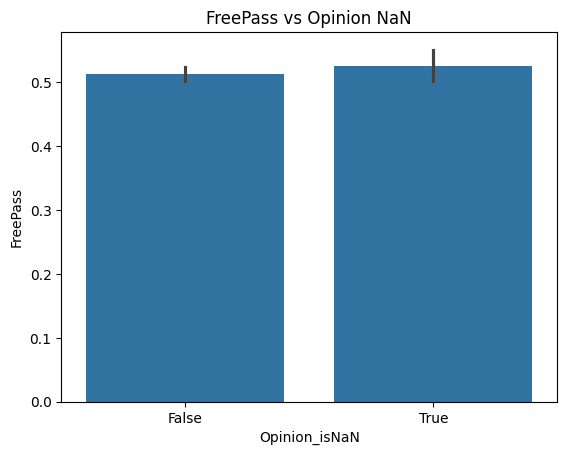

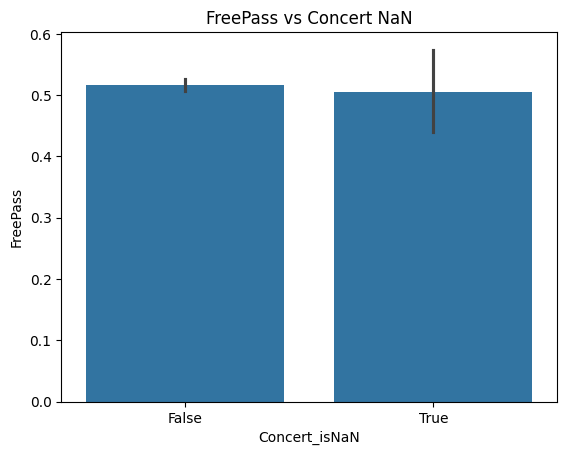

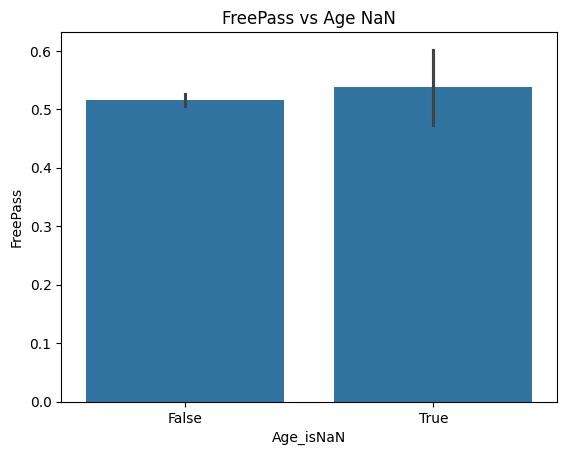

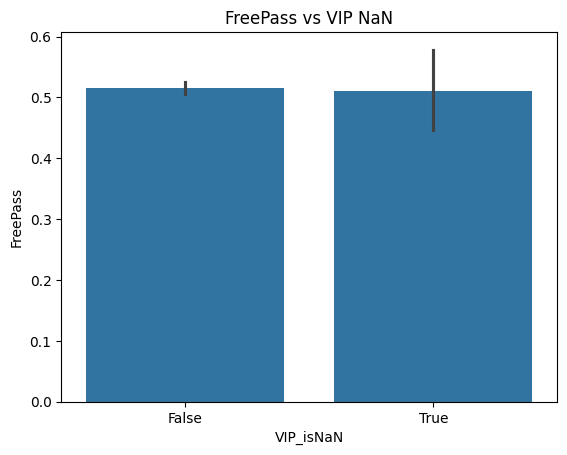

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in nan_cols:
    plt.figure()
    sns.barplot(
        x=f'{col}_isNaN',
        y='FreePass',
        data=train
    )
    plt.title(f'FreePass vs {col} NaN')
    plt.show()


In [240]:
from scipy.stats import chi2_contingency

for col in nan_cols:
    table = pd.crosstab(train[f'{col}_isNaN'], train['FreePass'])
    chi2, p, _, _ = chi2_contingency(table)
    print(f'{col}: p-value = {p:.4f}')



PreferedAlbum: p-value = 0.8606
Vinyl: p-value = 0.0979
TicketInfo: p-value = 0.9584
Opinion: p-value = 0.3852
Concert: p-value = 0.7965
Age: p-value = 0.5701
VIP: p-value = 0.9294


Se analizó si la ausencia de valores en cada variable codificaba información respecto a la variable objetivo. Para ello se crearon variables indicadoras (isNaN) y se analizaron visual y estadísticamente. No se observaron diferencias significativas, por lo que se asumió un patrón MCAR

Ninguna ausencia está relacionada con la variable objetivo.
Según el diagrama del profe, podríamos eliminarlo pero así perdemos sample data y para la competición igual no es lo adecuado. Se puede sustituir por la mediana en caso de variables numericas y por Missing en caso de las de tipo texto/booleano
- Age : mediana
- Opinion : meaningul category : "Missing"

In [241]:
# 1️⃣ Rellenar NaN en columnas numéricas
median_age = test['Age'].median()
test['Age'].fillna(median_age, inplace=True)
train['Age'].fillna(median_age, inplace=True)

cat_cols = ['PreferedAlbum', 'TicketInfo', 'Concert', 'Opinion']
bool_cols = ['Vinyl', 'VIP']

# 2️⃣ Rellenar NaN en columnas categóricas de texto
for col in cat_cols:
    test[col].fillna('Missing', inplace=True)
    train[col].fillna('Missing', inplace=True)

    
for col in bool_cols:
    # 1️⃣ Convertir todo a string (para mapear uniformemente)
    test[col] = test[col].astype(str)
    train[col] = train[col].astype(str)
    
    # 2️⃣ Reemplazar 'nan' (que aparece al convertir NaN a str) por 'False'
    test[col] = test[col].replace('nan','False')
    train[col] = train[col].replace('nan','False')
    
    # 3️⃣ Mapear a 0/1
    test[col] = test[col].map({'True':1, 'False':0, 'Missing':0})
    train[col] = train[col].map({'True':1, 'False':0, 'Missing':0})

In [242]:
test.drop(columns=[c for c in test.columns if c.endswith('_isNaN')], inplace=True)
train.drop(columns=[c for c in train.columns if c.endswith('_isNaN')], inplace=True)

train.isna().sum()

Id               0
PreferedAlbum    0
Vinyl            0
AvgTime          0
TicketInfo       0
Opinion          0
Concert          0
Age              0
VIP              0
Food             0
Drinks           0
FreePass         0
dtype: int64

Edades

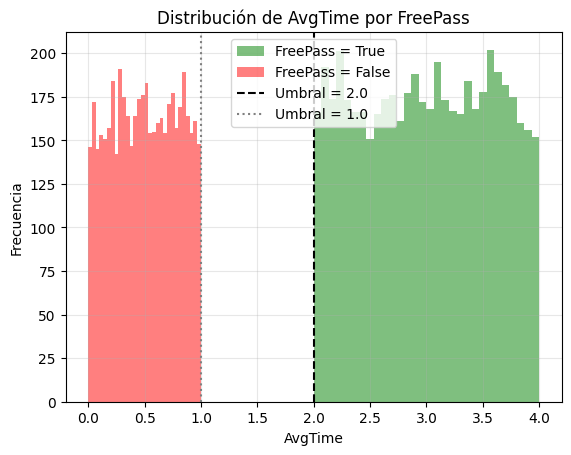

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Crear histogramas superpuestos
plt.hist(train[train['FreePass'] == True]['AvgTime'], 
         bins=30, alpha=0.5, label='FreePass = True', color='green')
plt.hist(train[train['FreePass'] == False]['AvgTime'], 
         bins=30, alpha=0.5, label='FreePass = False', color='red')

plt.axvline(x=2.0, color='black', linestyle='--', label='Umbral = 2.0')
plt.axvline(x=1.0, color='gray', linestyle=':', label='Umbral = 1.0')

plt.xlabel('AvgTime')
plt.ylabel('Frecuencia')
plt.title('Distribución de AvgTime por FreePass')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Parece que hay relacion con el avgtime con el free pass

# New feature

In [ ]:
train['HighAvgTime'] = train['AvgTime'] > 2
test['HighAvgTime'] = test['AvgTime'] > 2



# Primera prueba - Random Forest

In [260]:
X = train.drop(columns=['FreePass', 'Id']) # Columnas relevantes
y = train['FreePass']

Dividir datos en train, test y validation

In [259]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


One-hot Encoding (con pd.get_dummies)
- RandomForest y KNN (needed)

In [261]:
categorical_cols = ['PreferedAlbum', 'TicketInfo', 'Concert']

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val   = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)

# Transformar opinion a longitud de texto
X_train['Opinion_length'] = X_train['Opinion'].str.len()
X_val['Opinion_length'] = X_val['Opinion'].str.len()

X_train = X_train.drop(columns=['Opinion'])
X_val = X_val.drop(columns=['Opinion'])
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_val


,Vinyl,AvgTime,Age,VIP,Food,Drinks,HighAvgTime,PreferedAlbum_Head Hunters,PreferedAlbum_Kind of Blue,PreferedAlbum_Missing,...,TicketInfo_RB/98/XL,TicketInfo_RB/99/XL,TicketInfo_RT/0/XL,TicketInfo_RT/1/XL,TicketInfo_RT/3/N,TicketInfo_RT/3/XL,Concert_Missing,Concert_NYC12-5pm,Concert_SF14-7pm,Opinion_length
7498,1,2.969,33.0,0,0.0,0.0,True,False,True,False,...,0,0,0,0,0,0,False,False,False,56
8752,1,0.075,27.0,0,0.0,0.0,False,True,False,False,...,0,0,0,0,0,0,False,True,False,67
6313,0,0.294,55.0,0,14.0,3779.0,False,False,False,False,...,0,0,0,0,0,0,False,False,False,61
2033,0,0.799,50.0,0,1999.0,1859.0,False,False,True,False,...,0,0,0,0,0,0,False,True,False,54
6162,1,2.871,24.0,0,0.0,0.0,True,False,False,False,...,0,0,0,0,0,0,False,True,False,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,0,2.684,19.0,0,500.0,210.0,True,True,False,False,...,0,0,0,0,0,0,True,False,False,91
3776,0,0.999,33.0,0,760.0,1866.0,False,False,True,False,...,0,0,0,0,0,0,False,True,False,53
355,1,3.766,25.0,0,0.0,0.0,True,False,False,False,...,0,0,0,0,0,0,False,True,False,62
6749,0,2.579,42.0,0,905.0,2.0,True,True,False,False,...,0,0,0,0,0,0,False,True,False,91


In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))



Validation Accuracy: 1.0


KNN

In [263]:
import numpy as np

def minmax_scaler(X_train, X_val):
    num_cols = ['AvgTime','Age','Food','Drinks','Opinion_length']
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    
    for col in num_cols:
        min_val = X_train[col].min()
        max_val = X_train[col].max()
        
        X_train_scaled[col] = (X_train[col] - min_val) / (max_val - min_val)
        X_val_scaled[col]   = (X_val[col] - min_val) / (max_val - min_val)  # usar min/max de train
    return X_train_scaled, X_val_scaled

X_train_scaled, X_val_scaled = minmax_scaler(X_train, X_val)


In [264]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Definir modelo
knn = KNeighborsClassifier(n_neighbors=5)  # puedes probar diferentes k

# Entrenar
knn.fit(X_train_scaled, y_train)

# Predecir en validación
y_val_pred = knn.predict(X_val_scaled)
print("Validation Accuracy KNN:", accuracy_score(y_val, y_val_pred))


Validation Accuracy KNN: 0.9995059288537549


# Clean

In [276]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --------------------------
# 1️⃣ Crear copias para preprocesar
# --------------------------
X = train.drop(columns=['Id','FreePass']).copy()
y = train['FreePass'].copy()

X_test = test.drop(columns=['Id']).copy()
test_ids = test['Id'].copy()  # Guardamos los IDs originales

# --------------------------
# 2️⃣ Rellenar NaNs y mapear booleanas a 0/1 (solo en las copias)
# --------------------------
# Numéricas
num_cols = ['Age','AvgTime','Food','Drinks']
for col in num_cols:
    median_val = X[col].median()
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(median_val)
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce').fillna(median_val)

# Booleanas
bool_cols = ['Vinyl','VIP']
for col in bool_cols:
    X[col] = X[col].map({True:1, False:0}).fillna(0)
    X_test[col] = X_test[col].map({True:1, False:0}).fillna(0)

# Categóricas
cat_cols = ['PreferedAlbum','TicketInfo','Concert','Opinion']
for col in cat_cols:
    X[col] = X[col].fillna('Missing')
    X_test[col] = X_test[col].fillna('Missing')

# --------------------------
# 3️⃣ Feature HighAvgTime
# --------------------------
X['HighAvgTime'] = (X['AvgTime'] > 2).astype(int)
X_test['HighAvgTime'] = (X_test['AvgTime'] > 2).astype(int)

# --------------------------
# 4️⃣ Opinion a longitud de texto
# --------------------------
X['Opinion_length'] = X['Opinion'].str.len()
X_test['Opinion_length'] = X_test['Opinion'].str.len()

X = X.drop(columns=['Opinion'])
X_test = X_test.drop(columns=['Opinion'])

# --------------------------
# 5️⃣ Dummies de categóricas
# --------------------------
categorical_cols = ['PreferedAlbum','TicketInfo','Concert']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Alinear columnas de test con train
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# --------------------------
# 6️⃣ Escalado Min-Max
# --------------------------
num_cols = ['AvgTime','Age','Food','Drinks','Opinion_length']
for col in num_cols:
    min_val = X[col].min()
    max_val = X[col].max()
    X[col] = (X[col] - min_val) / (max_val - min_val)
    X_test[col] = (X_test[col] - min_val) / (max_val - min_val)

# --------------------------
# 7️⃣ Split train/validation para KNN
# --------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  stratify=y, random_state=42)

# --------------------------
# 8️⃣ Entrenar KNN
# --------------------------
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=5)
print("CV Accuracy:", np.mean(scores), "+/-", np.std(scores))
knn.fit(X_train, y_train)

# Validación
y_val_pred = knn.predict(X_val)
print("Validation Accuracy KNN:", accuracy_score(y_val, y_val_pred))

# --------------------------
# 9️⃣ Predecir test y crear submission
# --------------------------
y_test_pred = knn.predict(X_test)
submission = pd.DataFrame({'Id': test_ids, 'FreePass': y_test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission creada! Lista para Kaggle.")


CV Accuracy: 0.9999011369253583 +/- 0.00019772614928323937
Validation Accuracy KNN: 0.9995059288537549
Submission creada! Lista para Kaggle.


In [279]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# --------------------------
# 1️⃣ Preparar features y target
# --------------------------
X = train.drop(columns=['Id','FreePass']).copy()
y = train['FreePass'].copy()

X_test = test.drop(columns=['Id']).copy()
test_ids = test['Id'].copy()

# --------------------------
# 2️⃣ Preprocesamiento
# --------------------------
# Rellenar NaNs numéricas
num_cols = ['Age','AvgTime','Food','Drinks']
for col in num_cols:
    median_val = X[col].median()
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(median_val)
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce').fillna(median_val)

# Booleanas
bool_cols = ['Vinyl','VIP']
for col in bool_cols:
    X[col] = X[col].map({True:1, False:0}).fillna(0)
    X_test[col] = X_test[col].map({True:1, False:0}).fillna(0)

# Categóricas
cat_cols = ['PreferedAlbum','TicketInfo','Concert','Opinion']
for col in cat_cols:
    X[col] = X[col].fillna('Missing')
    X_test[col] = X_test[col].fillna('Missing')

# Feature HighAvgTime
#X['HighAvgTime'] = (X['AvgTime'] > 2).astype(int)
#X_test['HighAvgTime'] = (X_test['AvgTime'] > 2).astype(int)

# Opinion_length
X['Opinion_length'] = X['Opinion'].str.len()
X_test['Opinion_length'] = X_test['Opinion'].str.len()
X = X.drop(columns=['Opinion'])
X_test = X_test.drop(columns=['Opinion'])

# Dummies categóricas
categorical_cols = ['PreferedAlbum','TicketInfo','Concert']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Alinear columnas
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# --------------------------
# 3️⃣ Split train/validation
# --------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                  stratify=y, random_state=42)

# --------------------------
# 4️⃣ RandomForest
# --------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
# Cross-validation para ver generalización
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
print("CV Accuracy RandomForest:", cv_scores.mean(), "+/-", cv_scores.std())

# Entrenar sobre train completo
rf.fit(X_train, y_train)

# Validación local
y_val_pred = rf.predict(X_val)
print("Validation Accuracy RandomForest:", accuracy_score(y_val, y_val_pred))

# --------------------------
# 5️⃣ Predecir test y generar submission
# --------------------------
y_test_pred = rf.predict(X_test)
submission = pd.DataFrame({'Id': test_ids, 'FreePass': y_test_pred})
submission.to_csv('submission_rf.csv', index=False)
print("Submission RandomForest creada! Lista para Kaggle.")


CV Accuracy RandomForest: 1.0 +/- 0.0
Validation Accuracy RandomForest: 1.0
Submission RandomForest creada! Lista para Kaggle.
